In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('../data/TRD/JN540s1tc0Cha0.csv')

In [3]:
data.keys()

Index(['S00', 'S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', 'S09',
       'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19',
       'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29',
       'S30', 'S31', 'S32', 'S33', 'S34', 'S35', 'S36', 'S37', 'S38', 'S39',
       'S40', 'S41', 'S42', 'S43', 'S44', 'S45', 'S46', 'S47', 'S48', 'S49',
       'S50', 'S51', 'S52', 'S53', 'S54', 'S55', 'S56', 'S57', 'S58', 'S59',
       'Electron'],
      dtype='object')

In [4]:
data.shape

(27940, 61)

In [5]:
data.head(10)

,S00,S01,S02,S03,S04,S05,S06,S07,S08,S09,...,S51,S52,S53,S54,S55,S56,S57,S58,S59,Electron
0,14.1,0.0,3.6,0.0,3.2,0.2,6.1,60.6,100.3,114.3,...,51.8,41.3,30.6,26.3,23.2,19.2,17.1,15.1,11.9,1
1,0.0,0.5,2.2,1.6,2.9,0.0,1.6,14.9,39.7,44.5,...,81.8,73.3,67.1,60.1,50.2,41.1,37.2,33.0,33.0,1
2,1.0,1.9,0.2,1.4,2.6,1.7,74.9,344.9,440.8,354.9,...,85.0,74.5,62.1,57.1,57.4,46.8,47.7,43.1,43.8,1
3,1.6,2.1,1.2,0.7,1.2,1.7,1.2,68.4,233.1,277.7,...,52.3,45.3,35.2,30.6,28.3,28.3,25.6,19.1,19.0,1
4,1.4,2.7,2.7,0.7,0.5,4.2,0.2,3.8,4.2,26.5,...,93.6,87.3,79.8,73.9,61.6,55.1,50.0,41.0,42.1,1
5,1.1,2.9,2.7,1.9,0.0,1.1,2.0,1.9,1.8,16.7,...,78.1,73.4,79.4,63.6,64.8,59.1,58.8,51.9,53.6,1
6,1.6,2.9,0.7,0.0,1.8,1.8,8.3,97.7,210.3,199.3,...,133.3,96.1,65.6,48.4,41.0,35.5,35.2,31.7,30.1,1
7,1.0,1.9,1.7,1.8,3.5,2.0,4.2,57.1,141.1,155.0,...,190.6,168.2,140.2,110.6,83.5,72.5,60.7,55.1,47.1,1
8,2.2,1.3,0.6,3.1,1.5,3.1,26.6,110.5,190.2,193.1,...,79.2,66.2,56.2,43.9,42.0,35.5,28.7,24.6,27.3,1
9,0.0,1.3,4.0,1.1,3.0,0.0,1.5,23.7,132.6,185.8,...,93.7,88.3,72.4,60.7,50.8,40.0,31.9,32.5,30.7,1


In [6]:
## series of sampling time values

t = np.arange(0.5, 60., 1., dtype=float)
#print(t)

In [7]:
## plot sampled signal for electrons and pions

#data_plot = data.drop('Electron', axis=1)
#data_plot_np = data_plot.to_numpy()
#np.size(data_plot_np, 0)
#plt.plot(t, data_plot_np[0], "r--")

In [8]:
## plot sampled signal for electrons

mask_ele = data['Electron'] == 1
data_ele = data[mask_ele]
print(type(data_ele))
print(data_ele.shape)
data_ele_plot = data_ele.drop('Electron', axis=1)
data_ele_plot_np = data_ele_plot.to_numpy()
np.size(data_ele_plot_np, 0)

<class 'pandas.core.frame.DataFrame'>
(13970, 61)


13970

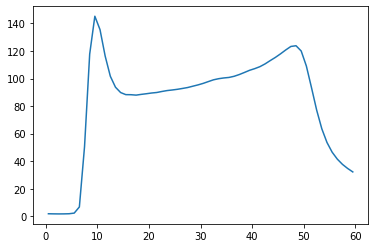

In [9]:
## calculate average sampled signal

i = 0
signal_ele = [60]
nsampl_ele = 10000
while i < nsampl_ele:
    signal_ele += data_ele_plot_np[i]
    i = i + 1

signal_ele /= nsampl_ele
plt.plot(t, signal_ele)


In [10]:
## plot signal for pions

mask_pio = data['Electron'] == 0
data_pio = data[mask_pio]
print(type(data_pio))
print(data_pio.shape)
data_pio_plot = data_pio.drop('Electron', axis=1)
data_pio_plot_np = data_pio_plot.to_numpy()
np.size(data_pio_plot_np, 0)

<class 'pandas.core.frame.DataFrame'>
(13970, 61)


13970

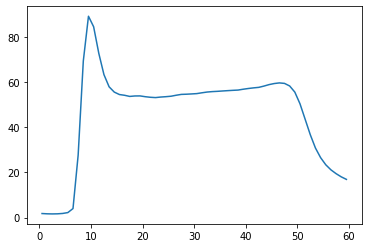

In [11]:
## calculate average sampled signal

i = 0
signal_pio = [60]
nsampl_pio = 10000
while i < nsampl_pio:
    signal_pio += data_pio_plot_np[i]
    i = i + 1

signal_pio /= nsampl_pio
plt.plot(t, signal_pio)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
data_X = data.loc[:,'S00':'S59']
data_y = data['Electron']
X_train, X_tmp, y_train, y_tmp = train_test_split(data_X, data_y, test_size=0.4, random_state=1)
X_test, X_validation, y_test, y_validation = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=1)

In [14]:
from sklearn import neighbors

In [15]:
n_neighbors = 1
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')

In [16]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [17]:
class_estimate = clf.predict(X_validation)

In [18]:
from sklearn.metrics.pairwise import euclidean_distances as dist

In [19]:
distances = dist(X_test, X_train)

In [20]:
test_labels = np.array(y_train.values[np.argmin(distances, axis = 1)])
test_labels[:10]

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0])

In [21]:
n_objs = y_validation.shape[0]
correct_number = sum(class_estimate == y_validation)
accuracy = float(correct_number/n_objs)
print('Accuracy = ', accuracy)

Accuracy =  0.7353256979241232


In [22]:
R2_knn_validation = clf.score(X_validation, y_validation)
print("R2_knn_validation = ", R2_knn_validation)

R2_knn_validation =  0.7353256979241232
